## Santander Customer Transaction Prediction

In this challenge we need ot identify which customers will make a specific transaction or not irrespective of the amount of money involved
For Imbalance dataset outlier detection is not needed

In [1]:
#importing required libraries
import os  # for input output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import lightgbm as lgb
import eli5

from collections import Counter

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from pdpbox import pdp, info_plots


from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix ,roc_auc_score,roc_curve,classification_report,auc
from sklearn.model_selection import StratifiedKFold


random_state = 42
np.random.seed(random_state)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting workng directory
os.chdir("C:/Users/dell/PYTHON DATA SCIENCE WORK/Santander") # replace \ with /

In [3]:
os.getcwd()

'C:\\Users\\dell\\PYTHON DATA SCIENCE WORK\\Santander'

In [4]:
#Importing train dataset
df_train = pd.read_csv("train.csv")
pd.options.display.max_columns = None #it sets the maximum number of columns to be displayed when you print a DataFrame to "None," which means there is no maximum limit.

In [5]:
df_train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [6]:
df_train.shape

(200000, 202)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
df_train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [9]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

## TARGET CLASS COUNT

In [10]:
# Target class count
target_class = df_train['target'].value_counts()
print("count of the target class \n",target_class)

# %age of target class count
per_target_class = df_train['target'].value_counts()/len(df_train)*100
print("%age  of the target class count \n",per_target_class)

count of the target class 
 0    179902
1     20098
Name: target, dtype: int64
%age  of the target class count 
 0    89.951
1    10.049
Name: target, dtype: float64


Text(0, 0.5, 'Index')

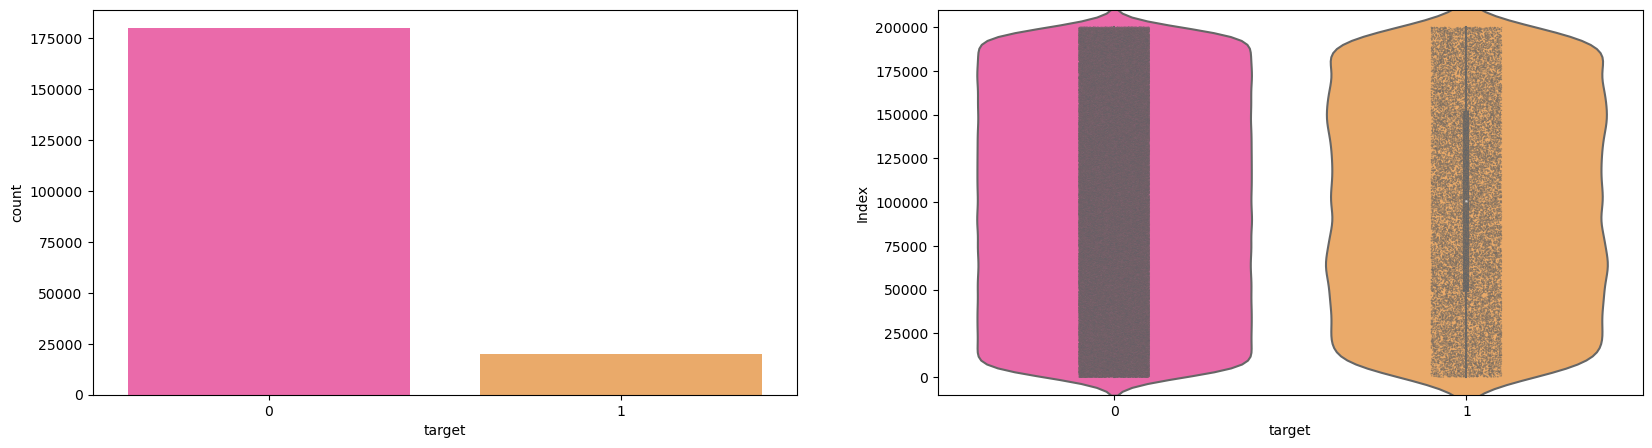

In [11]:
# Count plot & violin plot for target variable
fix,ax=plt.subplots(1,2,figsize = (20,5))
sns.countplot(x=df_train.target.values,ax=ax[0],palette='spring')
sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette='spring')
sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
ax[0].set_xlabel('target')
ax[1].set_xlabel('target')
ax[1].set_ylabel('Index')

observation:
We are having a unbalance dataset where 90% of data is no. of customers who will not make a transaction  and 10% of the data
are  those whoo will  make a transaction

from violin plot it seems that there is no relation bw the target and the index of the dataframe more dominating by 0 compare
to 1

from the jitter plot from the violin plot, the  target looks like uniformaly distributed over the index of the dataframe

## Distribution of train data set

In [12]:
# Define your plot_train_attribute_distribution function
def plot_train_attribute_distribution(t0, t1, label1, label2, train_attributes):
    sns.set_style('darkgrid')

    fig, axes = plt.subplots(10, 10, figsize=(22, 18))
    
    for i, attribute in enumerate(train_attributes):
        row, col = divmod(i, 10)  # Calculate the row and column for the current subplot
        ax = axes[row, col]  # Select the current subplot
        sns.distplot(t0[attribute], hist=False, label=label1, ax=ax)
        sns.distplot(t1[attribute], hist=False, label=label2, ax=ax)
        ax.legend()
        ax.set_xlabel("Attribute")
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    # Ensure proper spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

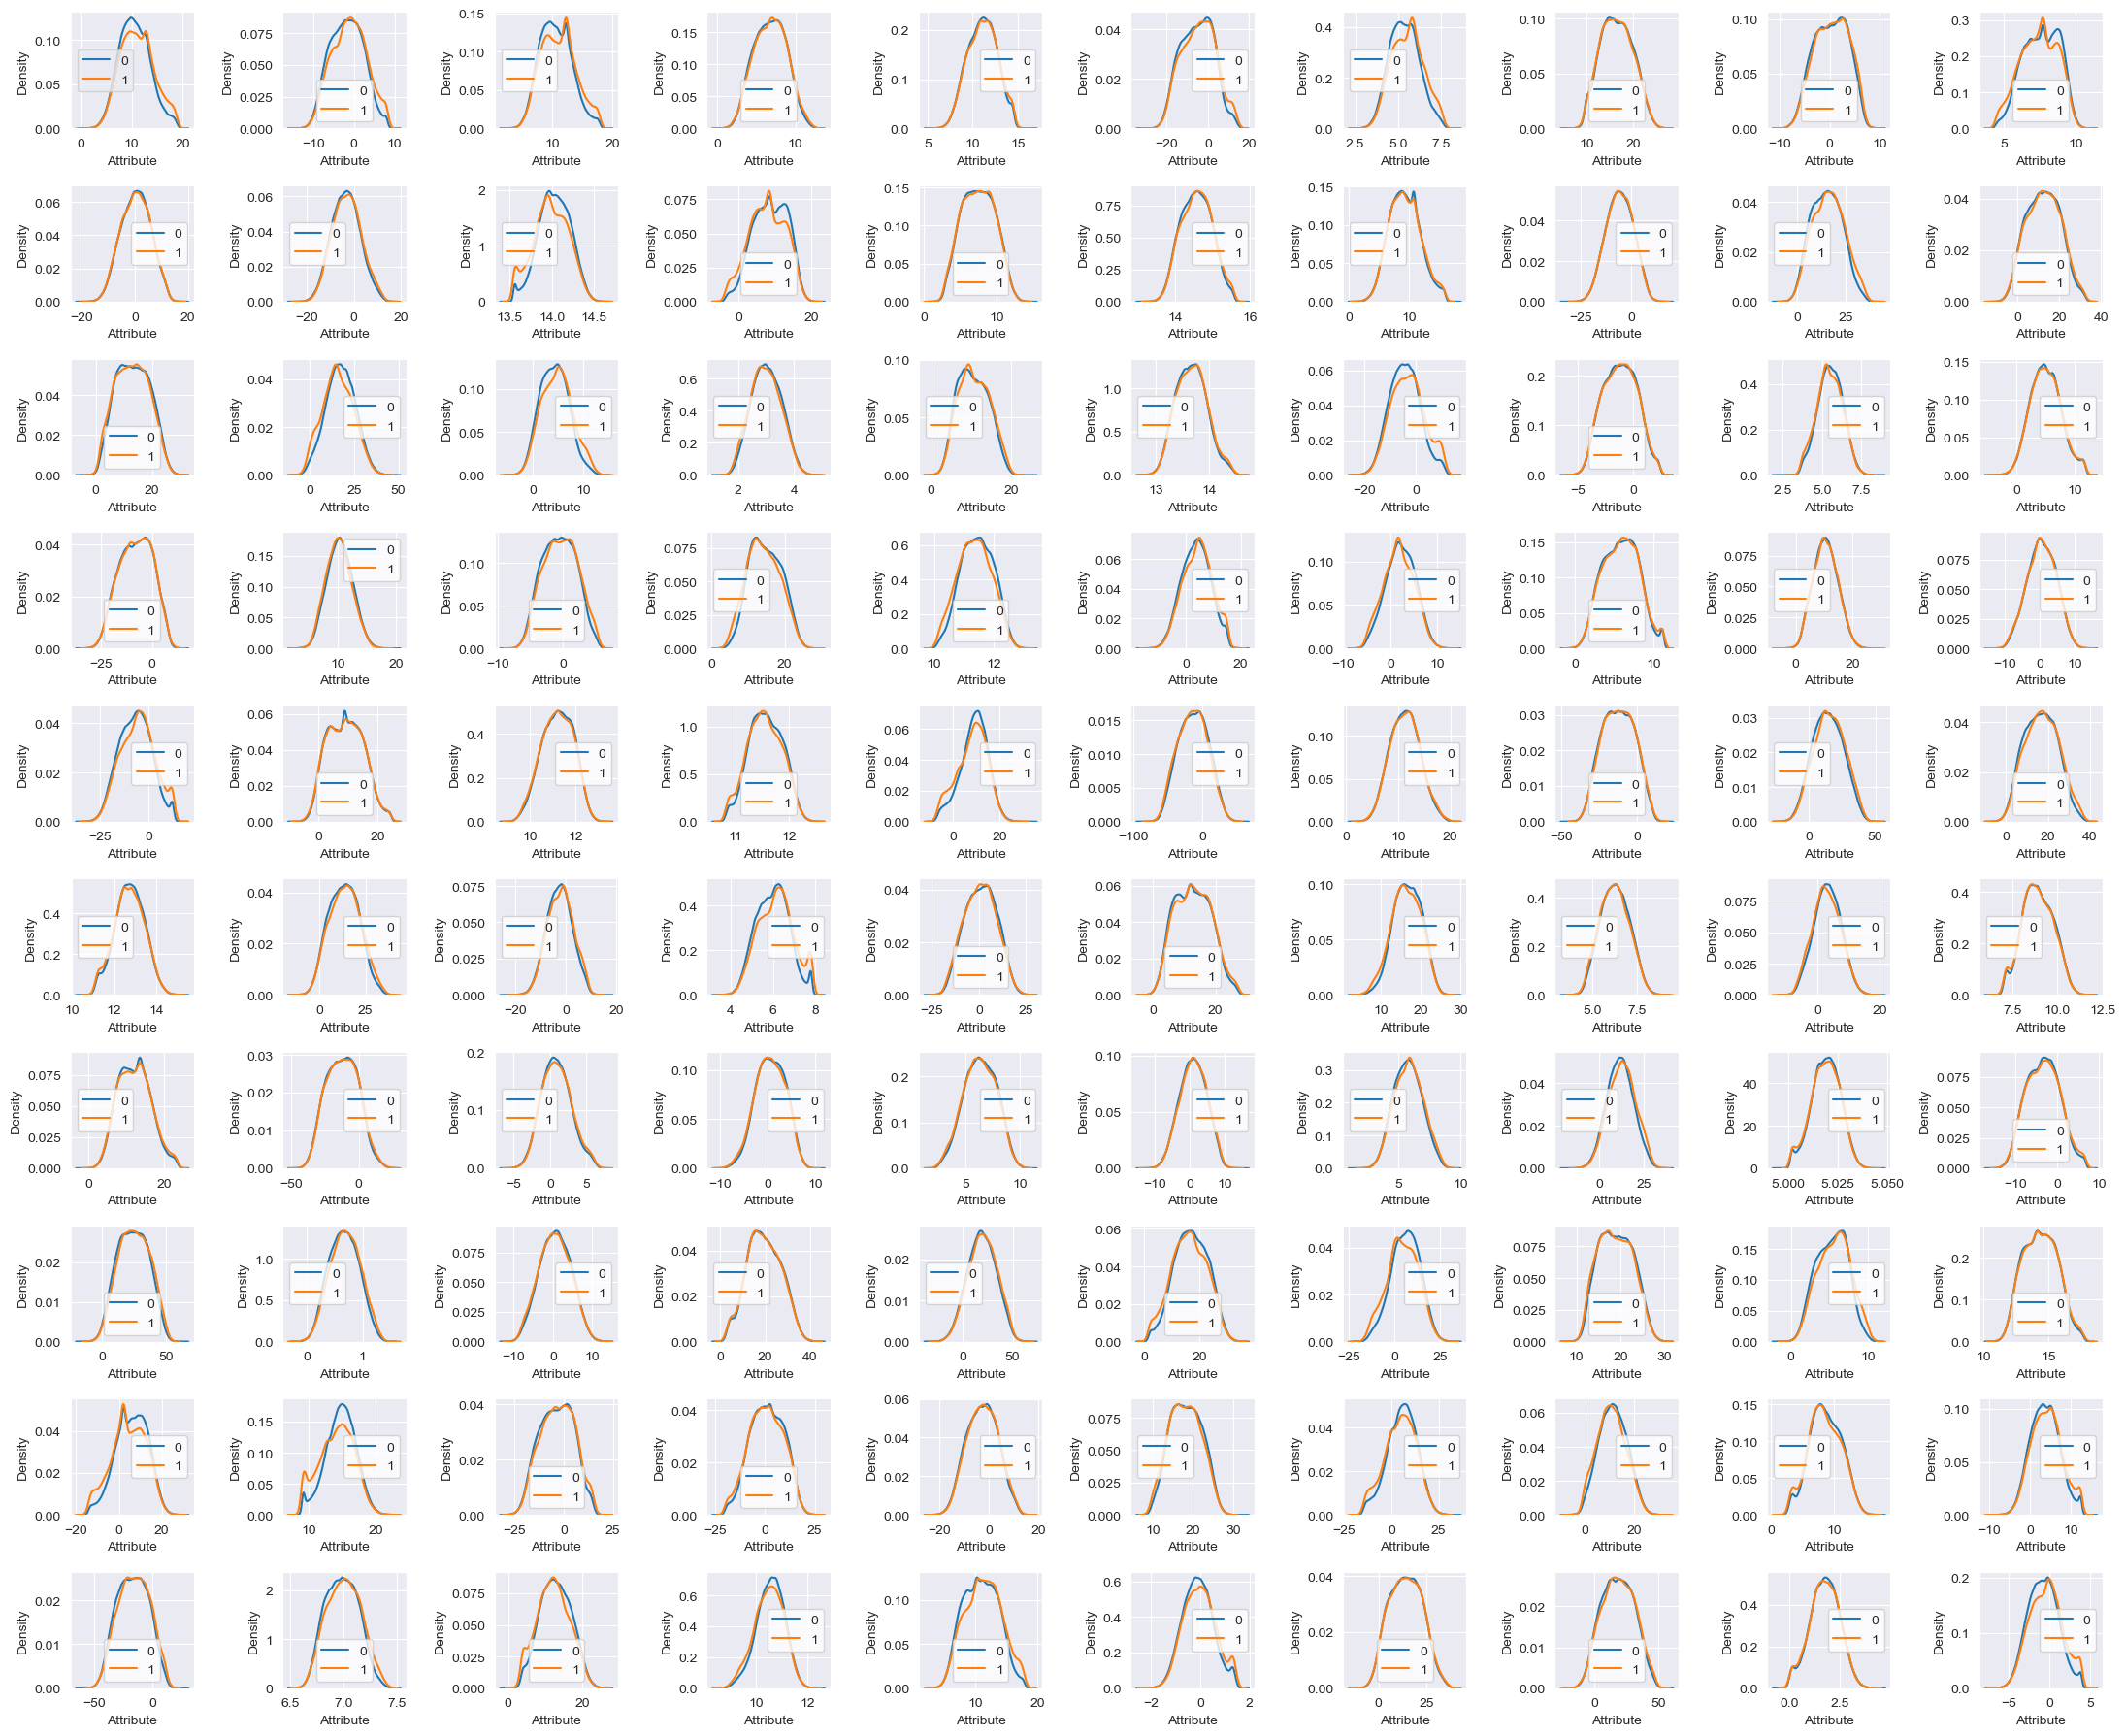

CPU times: total: 3min 26s
Wall time: 1min 46s


In [13]:
%%time
# corrosponding to negative class
t0=df_train[df_train.target.values==0]

# corrosponding to positive class
t1=df_train[df_train.target.values==1]

#train attribute from 2to102
train_attributes = df_train.columns.values[2:102]

#plot distribution of train attribute
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

# observing 100 attributes

Observation:
we can observe that there is a considerable number of feactures which have significantly different distribution.
for ex: var 0 ,var1 ,var 6 ,var 109 , var 199 etc.
Also  there is a considerable number of feactures which have same distribution,var101,var4 ,var5 ,var193

plotting next 100 attributes

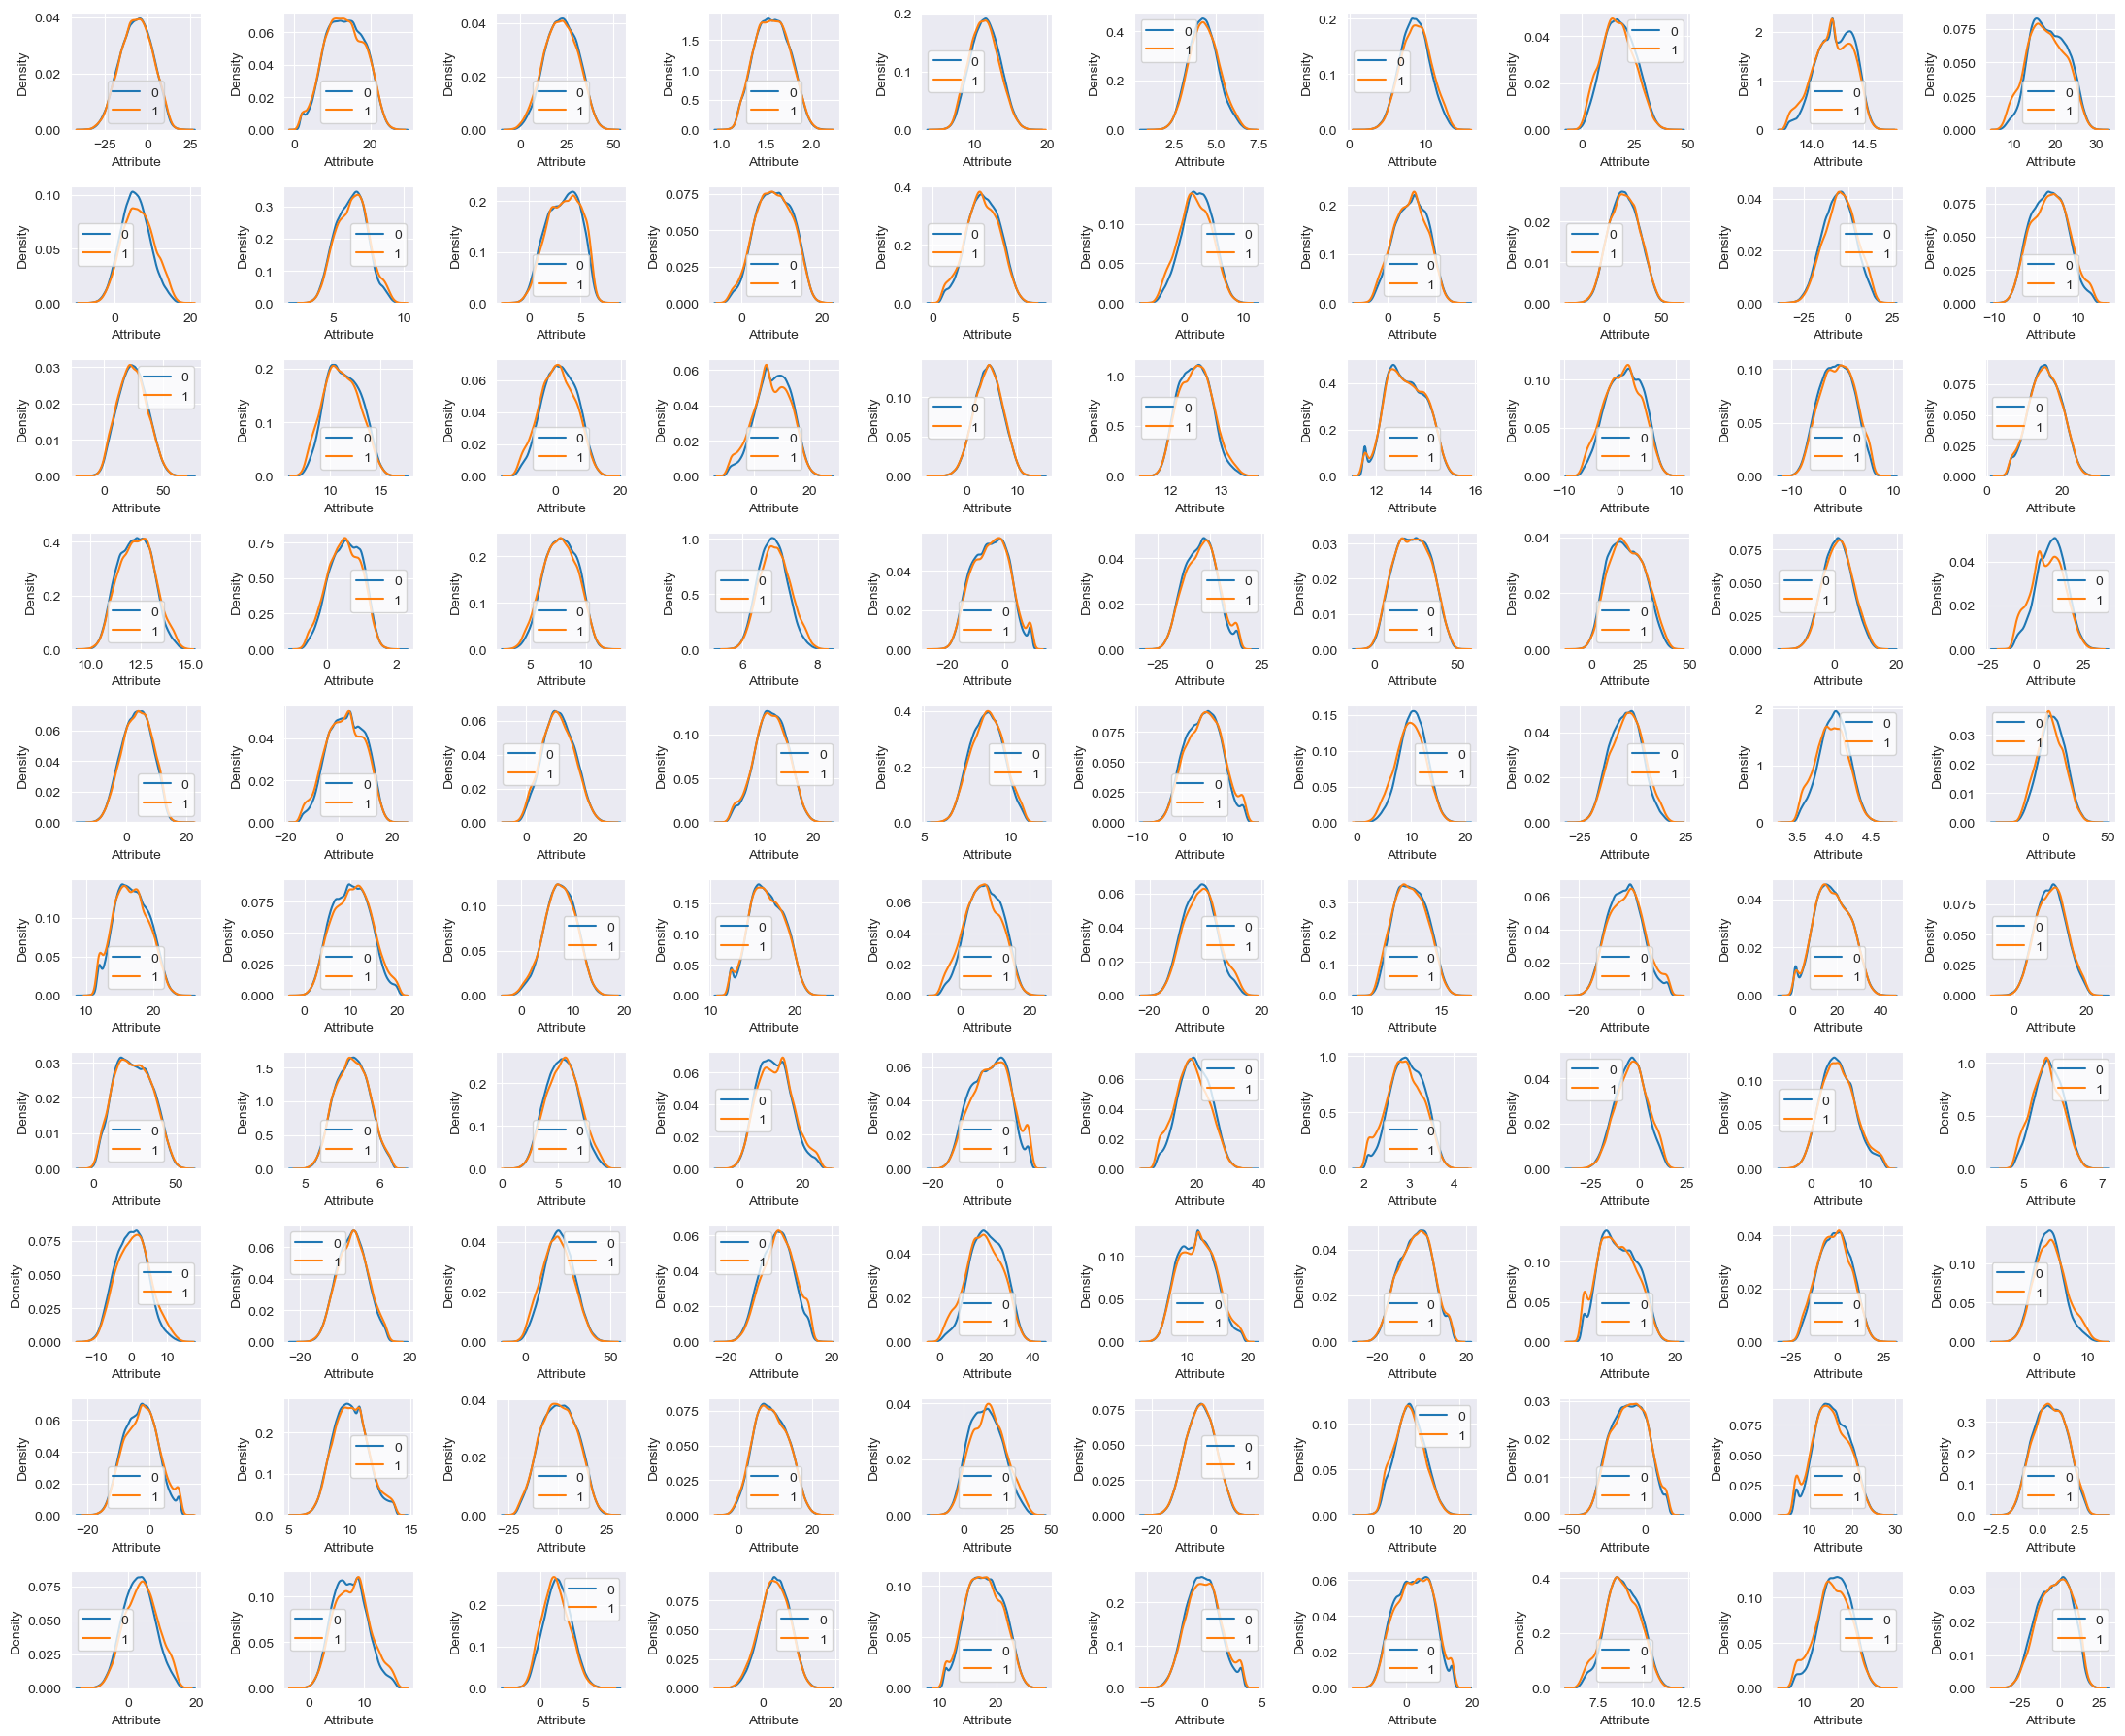

In [14]:
#train attribute from 102to202
train_attributes = df_train.columns.values[102:202]

#plot distribution of train attribute
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

Observation:
we can observe that there is a considerable number of feactures which have significantly different distribution.
for ex: var 0 ,var1 ,var 6 ,var 109 , var 199 etc.
Also  there is a considerable number of feactures which have same distribution,var101,var4 ,var5 ,var193

## Importing test data set

In [15]:
df_test = pd.read_csv("test.csv")


In [16]:
df_test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8   var_9  var_10  var_11   var_12   var_13   var_14  \
0  18.2675  2.1337  8.8100 -2.0248 -4.3554  13.9696   0.3458   7.5408   
1  18.6316 -4.4131  5.9739 -1.3809 -0.3310  14.1129   2.5667   5.4988   
2  20.2537  1.5233  8.3442 -4.7057 -3.0422  13.6751   3.8183  10.8535   
3  20.5660  3.3755  7.4578  0.0095 -5.0659  14.0526  13.5010   8.7660   
4  10.6048  2.9890  7.1437  5.1025 -3.2827  14.1013   8.9672   4.7276   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21  var_22  \
0  14.5001   7.7028 -19.0919  15.5806  16.1763   3.7088  18.8064  1.5899   
1  14.1853   7.0196   4.6564  29.1609   0.0910  12.1469   3.1389  5.2578   
2  14.2126   9.8837   2.6541  21.2181  20.8163  12.4666  12.3696  4.7473   
3  14.7352  10.0383 -15.3508   2.1273  21.4797  14.5372  12.5527  2.9707   
4  14.5811  11.8615   3.1480  18.0126  13.8006   1.6026  16.3059  6.7954   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  3.0654   6.4509  14.1192  -9.4902 -2.1917  5.7107  3.7864  -1.7981   
1  2.4228  16.2064  13.5023  -5.2341 -3.6648  5.7080  2.9965 -10.4720   
2  2.7936   5.2189  13.5670 -15.4246 -0.1655  7.2633  3.4310  -9.1508   
3  4.2398  13.7796  14.1408   1.0061 -1.3479  5.2570  6.5911   6.2161   
4  3.6015  13.6569  13.8807   8.6228 -2.2654  5.2255  7.0165 -15.6961   

    var_31  var_32   var_33   var_34  var_35  var_36  var_37   var_38  var_39  \
0   9.2645  2.0657  12.7753  11.3334  8.1462 -0.0610  3.5331   9.7804  8.7625   
1  11.4938 -0.9660  15.3445  10.6361  0.8966  6.7428  2.3421  12.8678 -1.5536   
2   9.7320  3.1062  22.3076  11.9593  9.9255  4.0702  4.9934   8.0667  0.8804   
3   9.5540  2.3628  10.2124  10.8047 -2.5588  6.0720  3.2613  16.5632  8.8336   
4  10.6239 -4.7674  17.5447  11.8668  3.0154  4.2546  6.7601   5.9613  0.3695   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0 -15.6305  18.8766  11.2864  11.8362  13.3680 -31.9891  12.1776   8.7714   
1  10.0309   3.1337  10.5742  11.7664   2.1782 -41.1924  13.5322 -17.3834   
2 -19.0841   5.2272   9.5977  12.1801   8.3565  15.1170  10.0921 -20.8504   
3  -4.8327   0.9554  12.3754  11.4241   6.6917 -12.9761  13.7343   5.0150   
4 -14.4364   5.1392  11.6336  12.0338  18.9670  12.0144  16.2096  -2.1966   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  17.2011  16.8508  13.0534  14.4069 -4.8525  7.3213 -0.5259  16.6365   
1   6.3806  12.5589  11.6887  25.3930  1.5776  6.8481  8.7348  16.4239   
2   8.6758   8.1292  11.8932  10.6869 -0.6434  5.6510  9.3742  25.8831   
3  31.3923   5.8555  12.6082   1.4182 -4.1185  6.2536  1.4257  13.5426   
4   1.1174  13.4532  12.7925   4.3775 -0.1543  5.6794  0.8210  19.1358   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  19.3036  6.4129 -5.3948   9.3269  11.9314  -3.5750 -0.7706  0.8705  6.9282   
1  21.7056  6.9345  1.6678   9.5249   5.3383 -18.7083  1.3382 -1.7401  5.8398   
2  19.8701  5.4834 -4.0304   8.5160   8.9776  -5.6619  2.8117  2.5996  9.0986   
3  15.4090  6.8761  1.7476  10.0413  15.2857  -4.1378  0.7928  2.5301  8.1458   
4  12.6589  6.4394  4.3425   8.7003  12.0586 -10.4753 -0.0337  5.6603  6.2529   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  2.8914  5.9744  17.4851  5.0125 -1.4230  33.3401  0.8018 -4.7906  30.2708   
1  3.1051  4.4307  16.0005  5.0306 -7.3365  12.2806  0.6992 -0.7772  21.5123   
2  7.1167  4.9466  13.8268  5.0093  4.7782  19.2081  0.4340  0.8459  34.8598   
3  2.5738  5.9876  13.0758

In [17]:
df_test.shape

(200000, 201)

In [18]:
%%time

# Distribution of test attribute


def plot_test_attribute_distribution(t0, t1, label1, label2, test_attributes):
    sns.set_style('darkgrid')

    fig, axes = plt.subplots(10, 10, figsize=(22, 18))
    
    for i, attribute in enumerate(test_attributes):
        row, col = divmod(i, 10)  # Calculate the row and column for the current subplot
        ax = axes[row, col]  # Select the current subplot
        sns.distplot(t0[attribute], hist=False, label=label1, ax=ax)
        sns.distplot(t1[attribute], hist=False, label=label2, ax=ax)
        ax.legend()
        ax.set_xlabel("Attribute")
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    # Ensure proper spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


observing 100 attribute

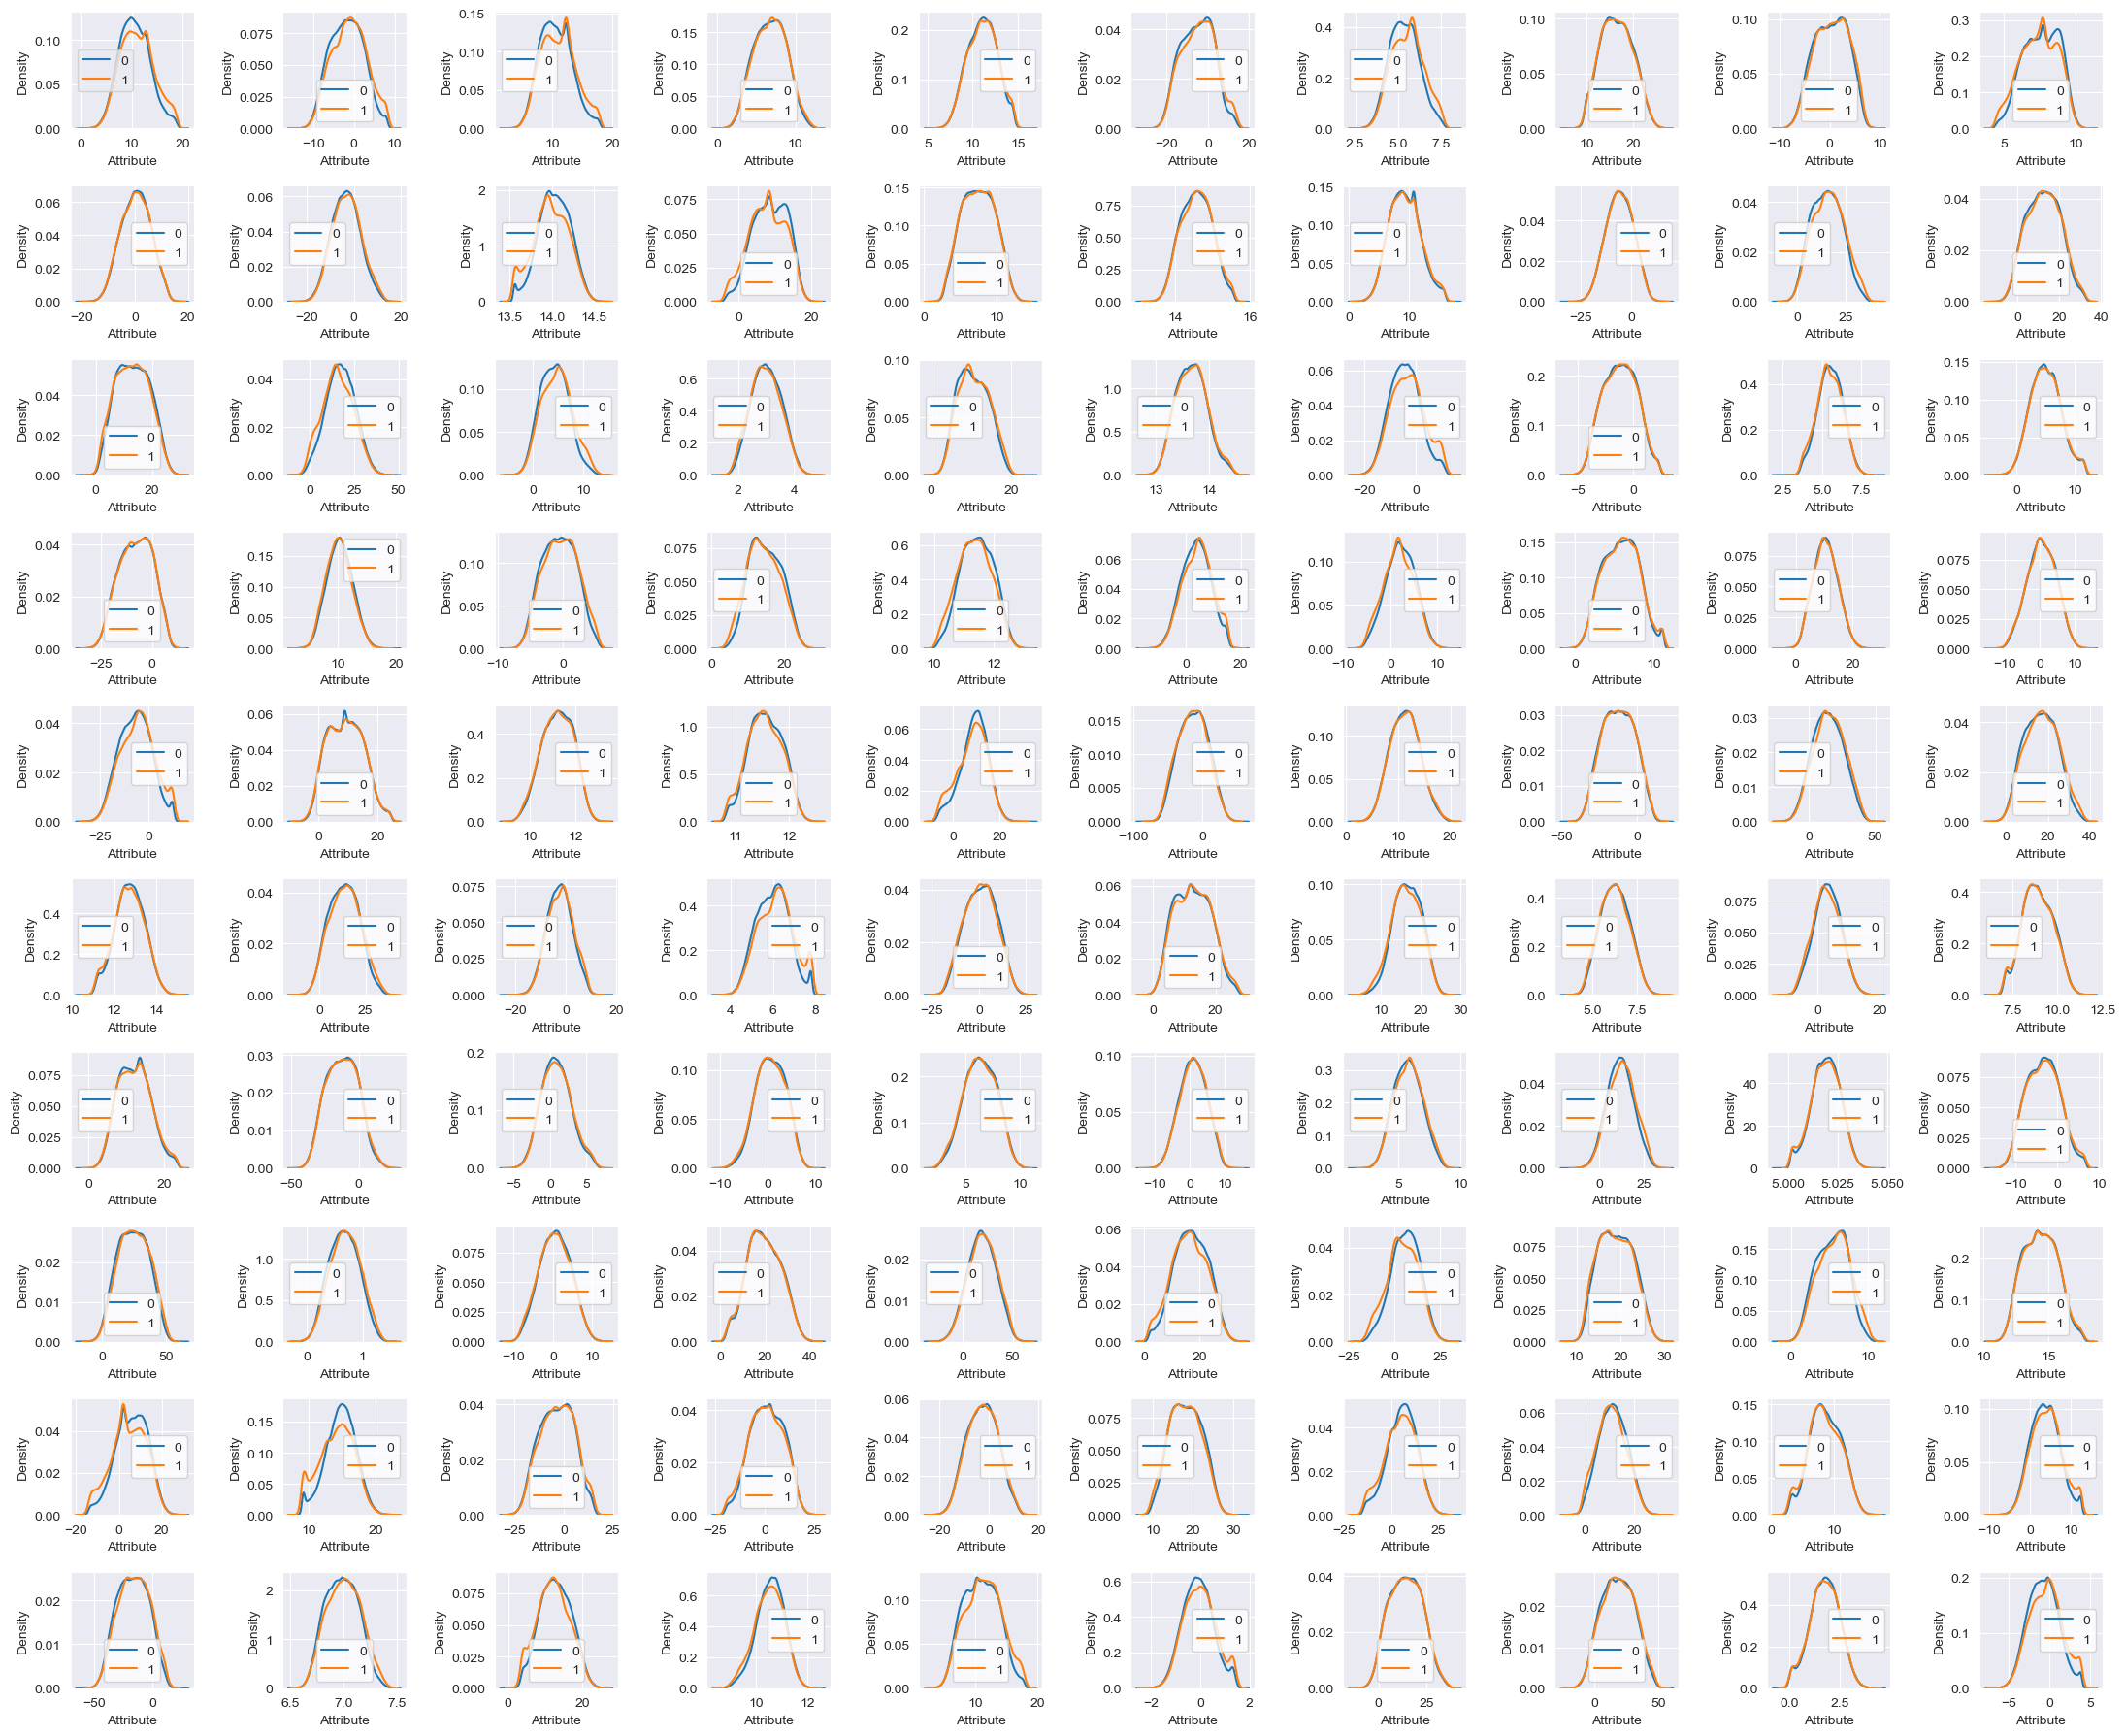

CPU times: total: 3min 28s
Wall time: 1min 51s


In [19]:
%%time

#test attribur from 1to101
test_attributes = df_test.columns.values[1:101]

# plot distribution of test attribute
plot_test_attribute_distribution(t0,t1,'0','1',test_attributes)

observing next 100 attribute

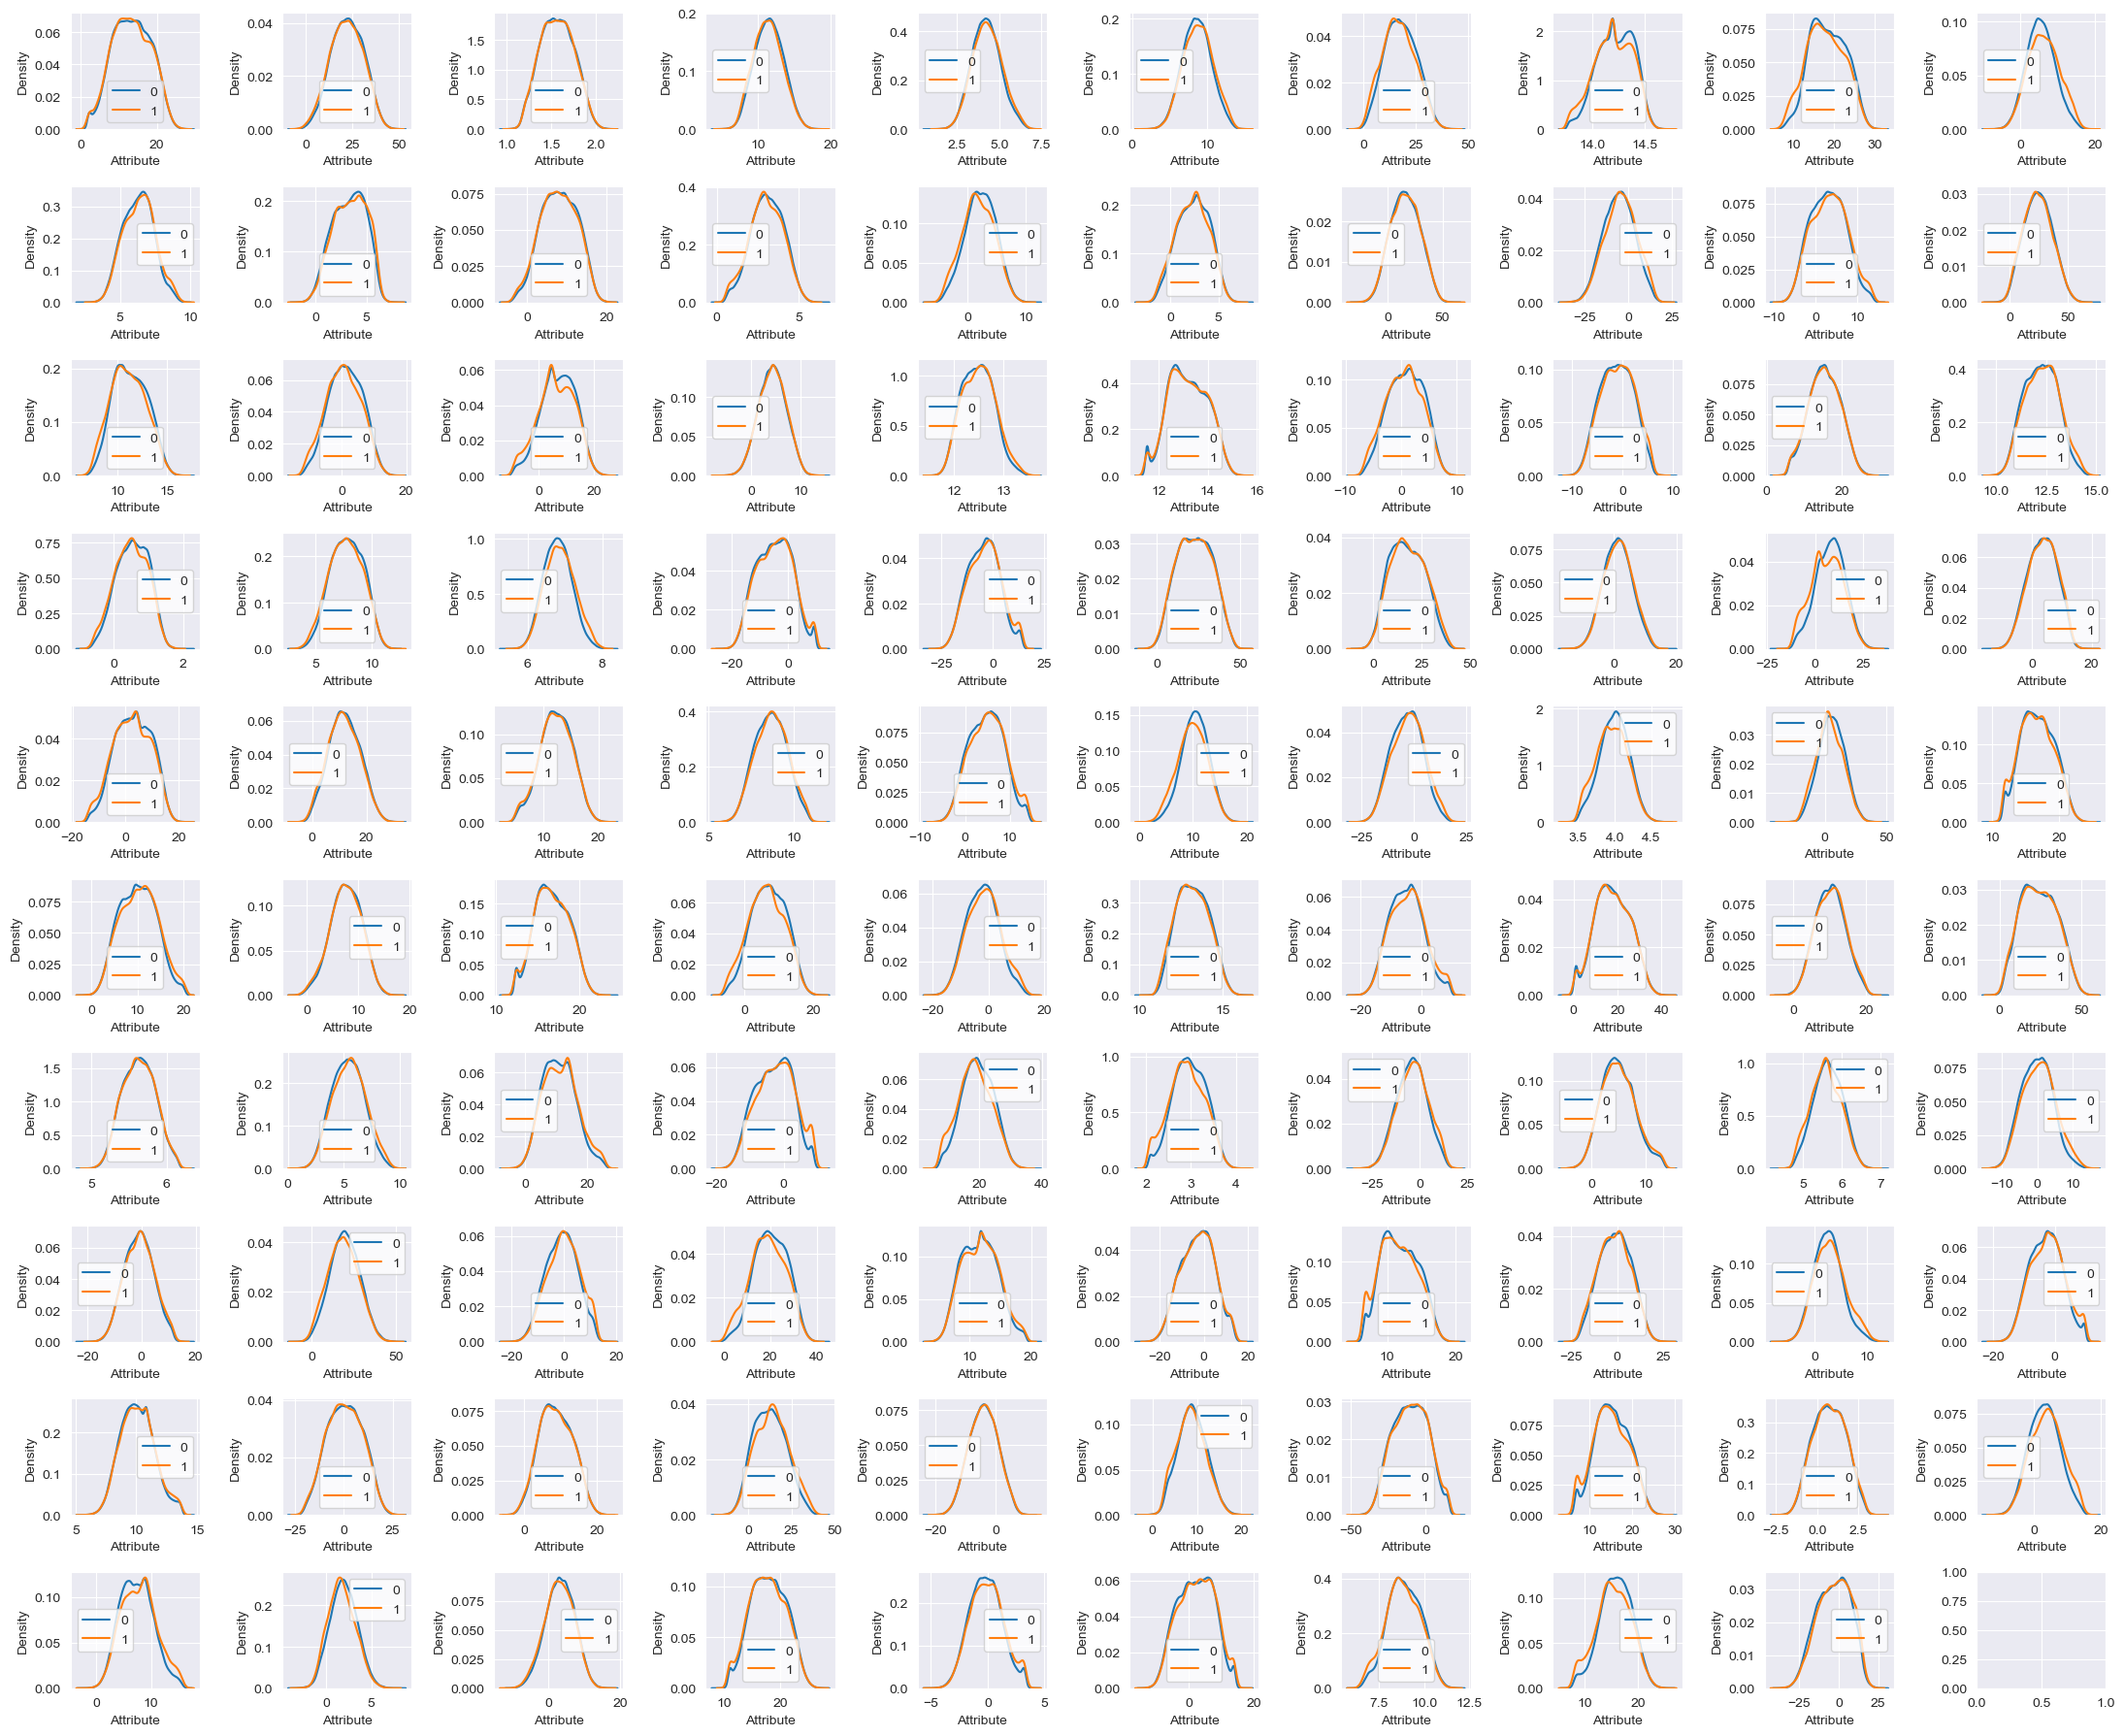

In [20]:
#test attribute from 102to202
test_attributes = df_test.columns.values[102:202]

#plot distribution of train attribute
plot_test_attribute_distribution(t0,t1,'0','1',test_attributes)

Distribution of mean value per coloumn and rows

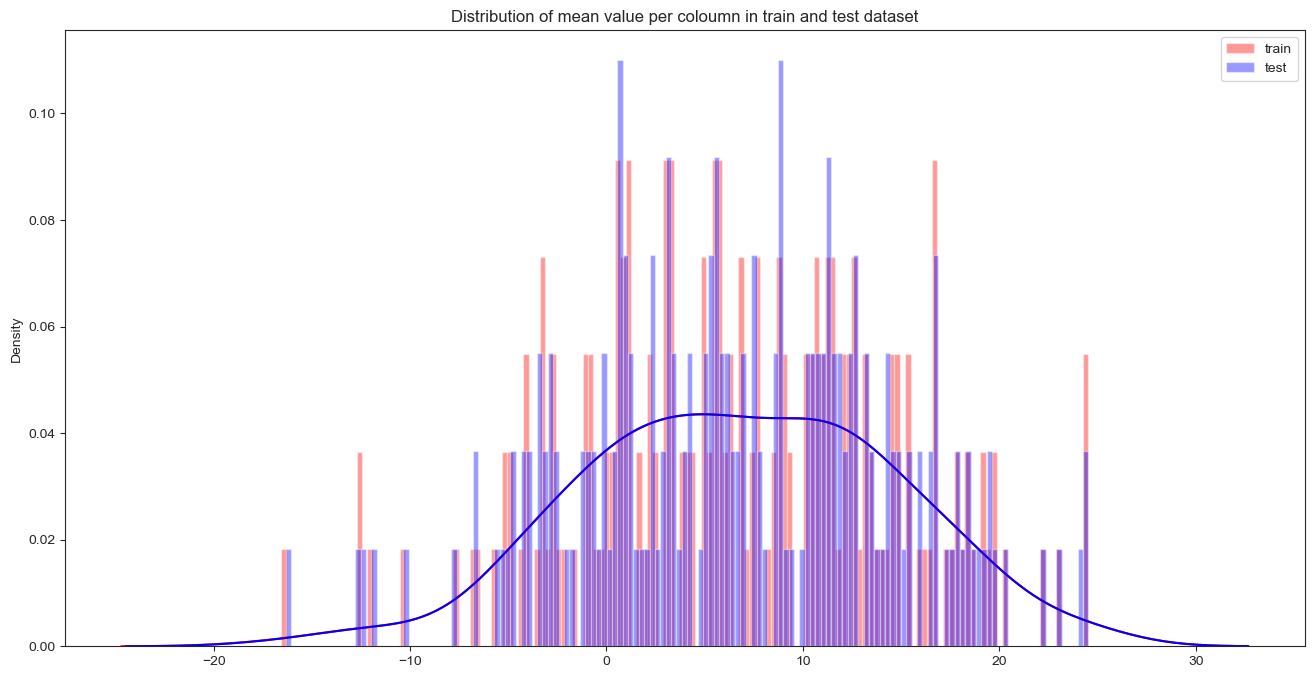

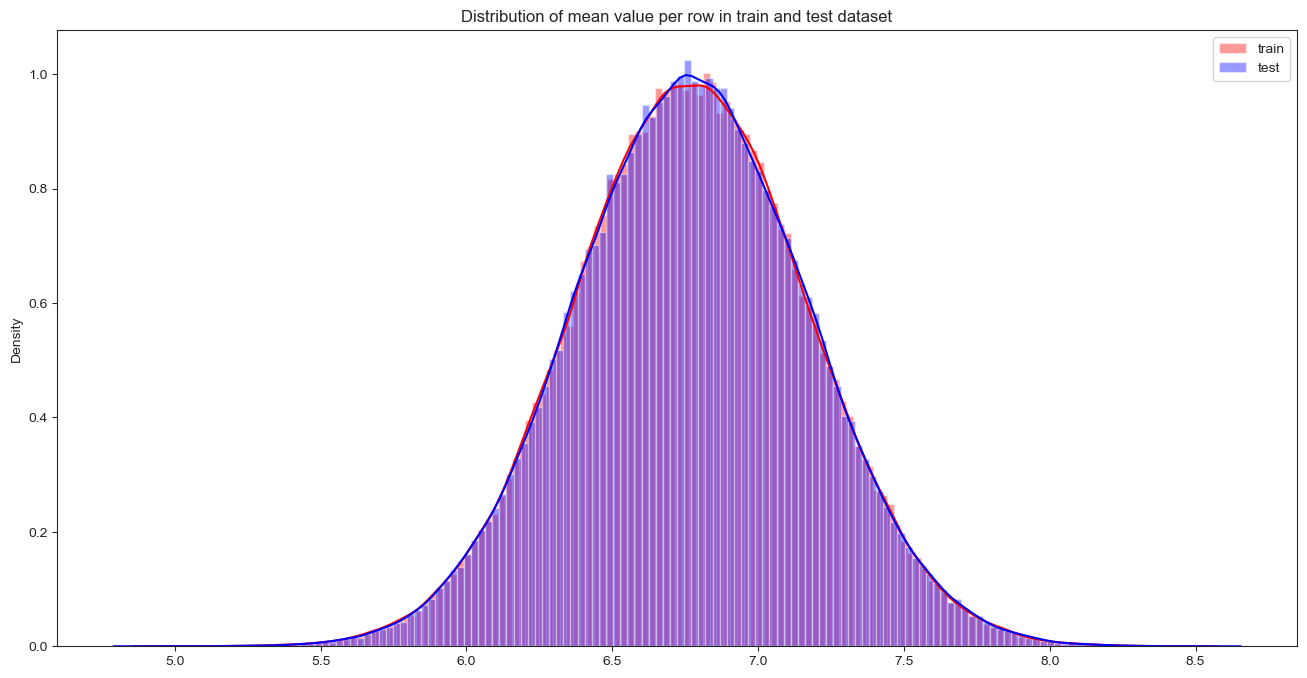

CPU times: total: 13.3 s
Wall time: 16.5 s


In [21]:
%%time
#Distribution of mean value per coloumn in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# train attributes
test_attributes = df_test.columns.values[1:201]

#Distribution plot for mean value per col for train attribute
sns.distplot(df_train[+train_attributes].mean(axis=0),color='Red',kde=True,bins=150,label='train')

#Distribution plot for mean value per col for test attribute
sns.distplot(df_test[test_attributes].mean(axis=0),color='Blue',kde=True,bins=150,label='test')

plt.title("Distribution of mean value per coloumn in train and test dataset")
plt.legend()
plt.show()



##Distribution of mean value per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution of mean value per rows in train attributes
sns.distplot(df_train[train_attributes].mean(axis=1),color='Red',kde=True,bins=150,label='train')

#Distribution plot for mean value per rows for test attribute
sns.distplot(df_test[test_attributes].mean(axis=1),color='Blue',kde=True,bins=150,label='test')

plt.title("Distribution of mean value per row in train and test dataset")
plt.legend()
plt.show()



observation : no transformation has to be done here bez it's follow normal dist

## Distribution of standard deviation  per coloumn and rows

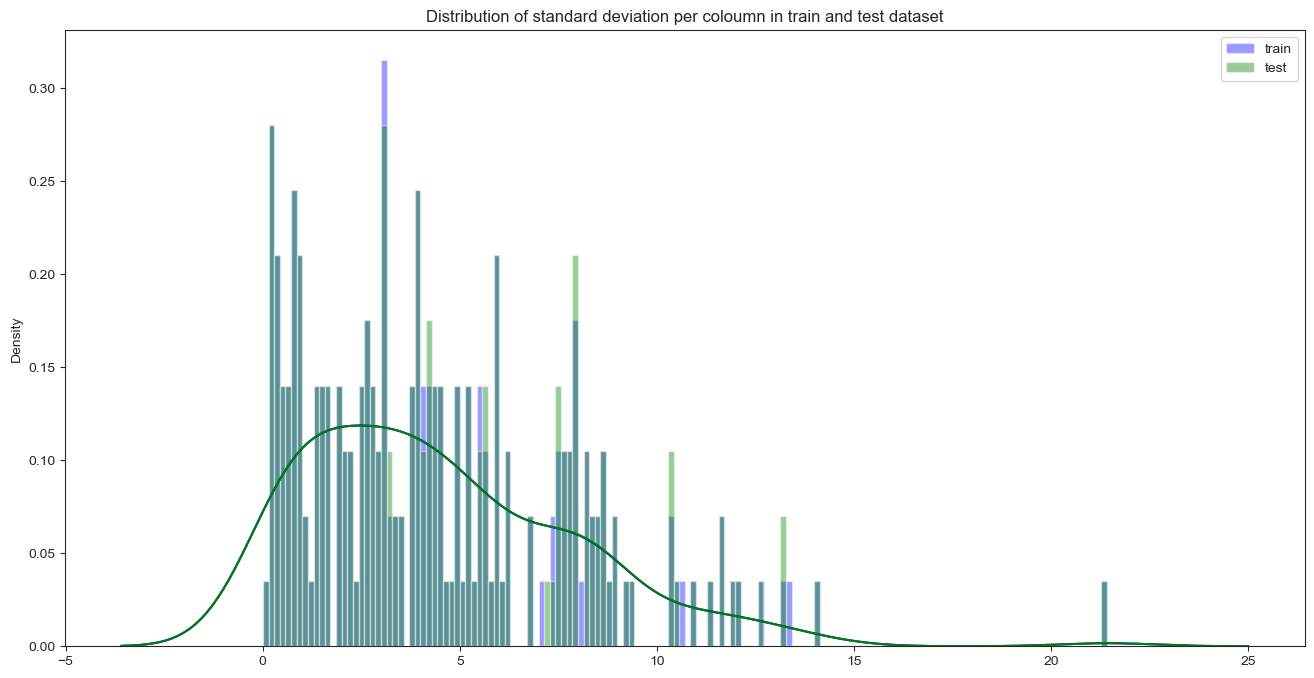

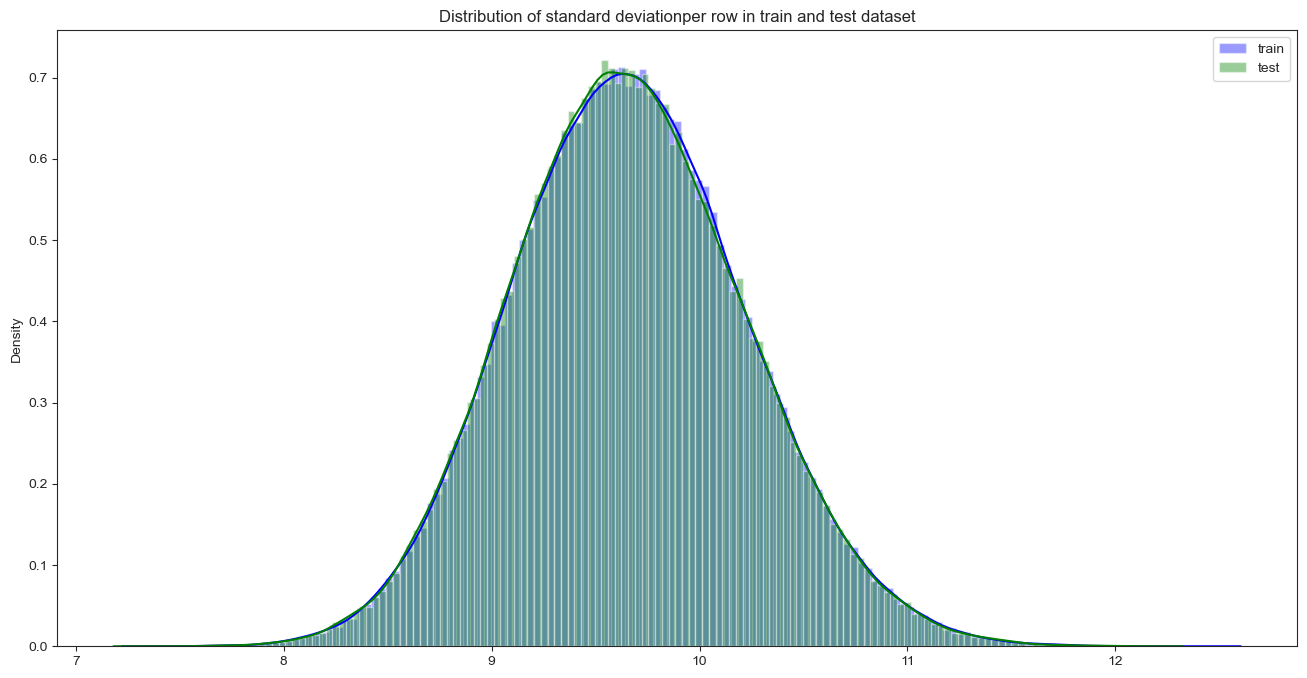

CPU times: total: 7.7 s
Wall time: 7.06 s


In [22]:
%%time
#Distribution of standard deviation per coloumn in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# train attributes
test_attributes = df_test.columns.values[1:201]

#Distribution plot for mean value per col for train attribute
sns.distplot(df_train[+train_attributes].std(axis=0),color='Blue',kde=True,bins=150,label='train')

#Distribution plot for mean value per col for test attribute
sns.distplot(df_test[test_attributes].std(axis=0),color='Green',kde=True,bins=150,label='test')

plt.title("Distribution of standard deviation per coloumn in train and test dataset")
plt.legend()
plt.show()



##Distribution of standard deviation per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution of mean value per rows in train attributes
sns.distplot(df_train[train_attributes].std(axis=1),color='Blue',kde=True,bins=150,label='train')

#Distribution plot for mean value per rows for test attribute
sns.distplot(df_test[test_attributes].std(axis=1),color='Green',kde=True,bins=150,label='test')

plt.title("Distribution of standard deviationper row in train and test dataset")
plt.legend()
plt.show()

## Distribution of Skewness per coloumn and rows

## Distribution of Kurtosis per coloumn and rows

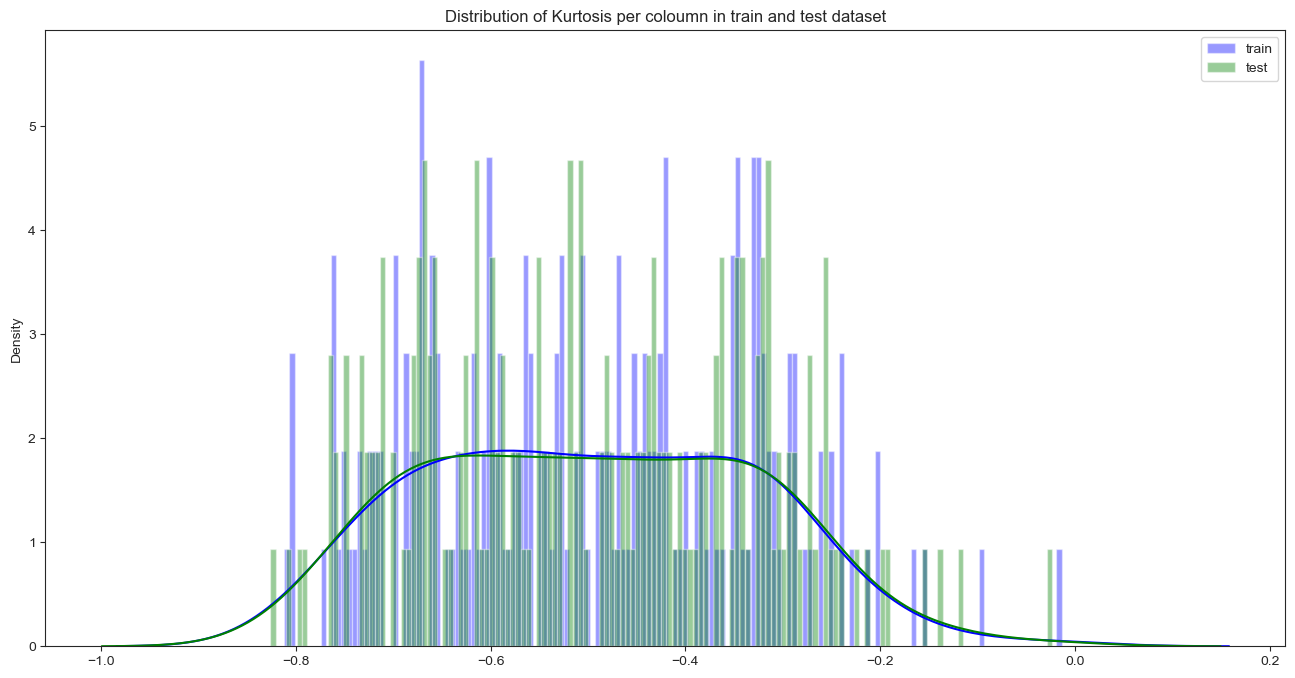

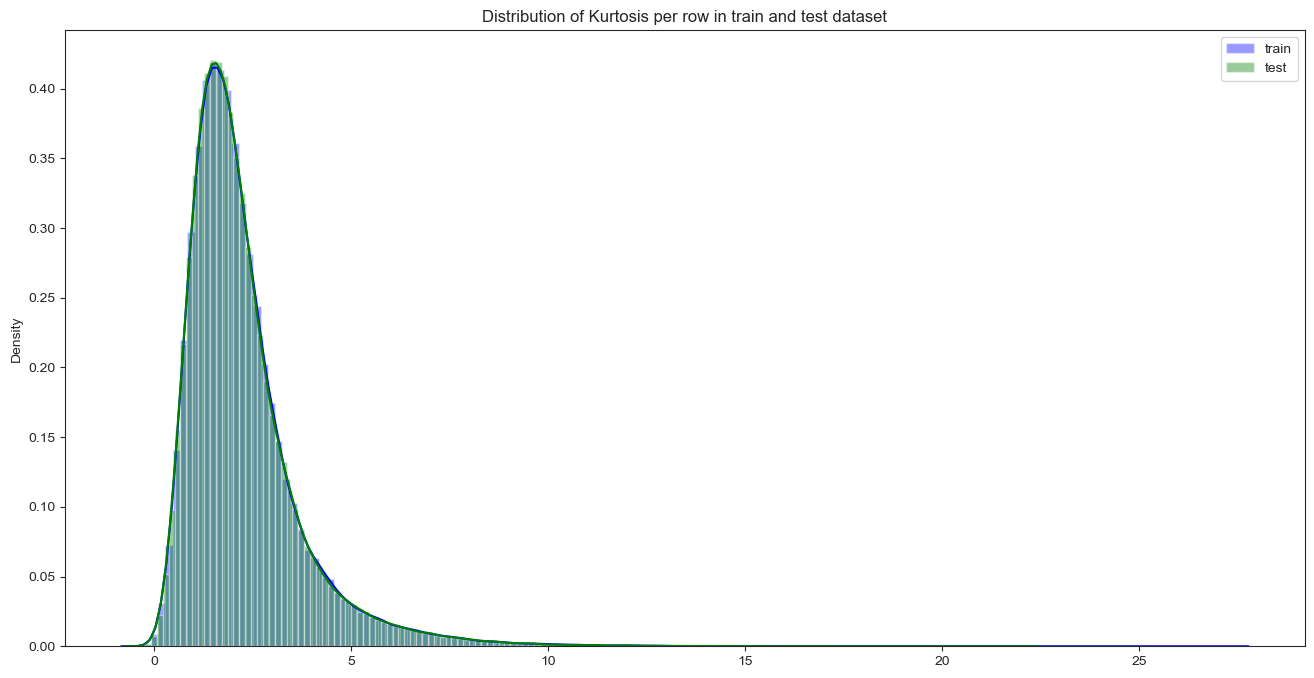

CPU times: total: 20 s
Wall time: 30.9 s


In [23]:
%%time
#Distribution of Kurtosis per coloumn in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# train attributes
test_attributes = df_test.columns.values[1:201]

#Distribution plot for mean value per col for train attribute
sns.distplot(df_train[+train_attributes].kurtosis(axis=0),color='Blue',kde=True,bins=150,label='train')

#Distribution plot for mean value per col for test attribute
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='Green',kde=True,bins=150,label='test')

plt.title("Distribution of Kurtosis per coloumn in train and test dataset")
plt.legend()
plt.show()



##Distribution of standard deviation per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution of mean value per rows in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='Blue',kde=True,bins=150,label='train')

#Distribution plot for mean value per rows for test attribute
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='Green',kde=True,bins=150,label='test')

plt.title("Distribution of Kurtosis per row in train and test dataset")
plt.legend()
plt.show()

## Missing Value Analysis 

In [24]:
%%time
# Find the missing value in train and test data set
train_missing = df_train.isnull().sum().sum()
test_missing = df_test.isnull().sum().sum()

print("missing value in train data" , train_missing)
print("missing value in test data" , test_missing)


missing value in train data 0
missing value in test data 0
CPU times: total: 922 ms
Wall time: 2.05 s


Observation : No missing value is present in both train and test data

## Coorelation between the attributes

In [ ]:
%%time
#coorelation in train attribute
train_attributes = df_train.columns.values[2:202]
train_correlation = df_train[train_attributes].corr().abs().unstack().sort_values(kind='quick_sort').reset_index()
train_correlation = train_correlation[train_correlation]['level_0']!=train_correlation['level_1']
print(train_correlation.head(10))
print(train_correlation.tail(10))

WE CAN ALSO DO THIS BY SEABORN

In [ ]:
%%time
#coorelation in test attribute
test_attributes = df_test.columns.values[2:202]
test_correlation = df_test[train_attributes].corr().abs().unstack().sort_values(kind='quick_sort').reset_index()
test_correlation = test_correlation[test_correlation]['level_0']!=test_correlation['level_1']
print(test_correlation.head(10))
print(test_correlation.tail(10))


observation:
coorelation among the test and train attribute is very small

## Correlation plot for train and test dataset

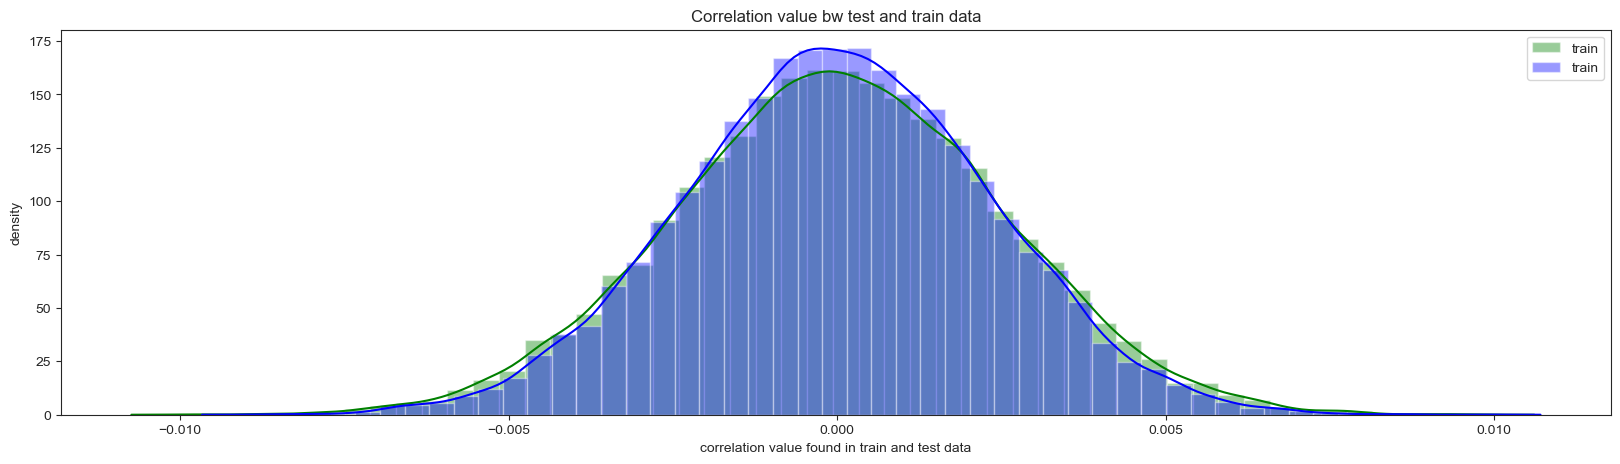

In [27]:
train_correlation=df_train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]

test_correlation=df_test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color='Green',label='train')
sns.distplot(test_correlation,color='Blue',label='train')

plt.xlabel('correlation value found in train and test data')
plt.ylabel('density')
plt.title('Correlation value bw test and train data')
plt.legend()



Correlation values found in train and test data is very small its completely visible from the graph 
(focus on the value not the graph)

Feacture selection is very imp for modelling the dataset,every dataset has good and unwanted feactures
We can select best features using ANOVA,CHII-SQUARE,AND CORRELATION MATRIX

WHEN THERE IS NO CORRELATION BW THE FEATURES THEN WE CANNOT DROP ANY FEATURE ALL IS IMP

## Feature Engineering 
## Using : Permutation importance (Partial Dependecy plots) 

## Traning and Testing the Data

In [28]:
X=df_train.drop(columns=['ID_code','target'],axis=1)
test=df_test.drop(columns=['ID_code'],axis=1)
y= df_train['target']

Build a simple model to find the features which are more important

In [29]:
# Split the train data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

Random Forest Classifier

In [30]:
%%time
rf_model = RandomForestClassifier(n_estimators=10,random_state=42)

#Fitting the Model
rf_model.fit(X_test,y_test)

CPU times: total: 25.6 s
Wall time: 26.1 s


RandomForestClassifier(n_estimators=10, random_state=42)

Calculating weights and observing some important features using eli5 library is a python package which helps to debug
machine learning classifier and explain their prediction

In [31]:
%%time
# Permutation Importance
from eli5.sklearn import PermutationImportance
perm_imp = PermutationImportance(rf_model,random_state=42)

#Fitting the model
perm_imp.fit(X_test,y_test)

CPU times: total: 2min 56s
Wall time: 2min 56s


PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [32]:
# Imp features
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)
#the feature importances (top 200) of your machine learning model based on the results of the permutation importance calculations. 
#This can help you understand which features have the most impact on the model's predictions.

Observation: Features having highest to lowest importance is in decreasing order as shown by the prediction ,features shown in 
dark green having higher positive impact on prediction and so on

partial dependecy plot :PDP gives a graphical depiction of marginal effect of a variable on a class probability,It shows how a 
feature effect prediction



In [ ]:

# Calculation of  partial depedency plot on random forest

features= [v for v in X_test.columns if v not in ['ID_code','target']]
pdp.data = pdp.pdp_isolate(rf_model , dataset =X_test , model_features=features ,feature = 'var_6')


In [ ]:
# Plot feature for var 6
pdp.pdp_plot(pdp_data,'var_6')
plt.show()

In [ ]:
# plot feature for var+5
pdp_data = pdp.pdp_isolate(f_pmodel, dataset=X_test, model_features=features, feature='var_6')
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

Observation : The yaxis shows how the value changes with change in the value of predictable variable,
The blue shaded area indicate level of confidence of var_53.only yaxis having a positve values means for 
that particular value it is less likely to predict the correct class and having a positive value means
it has positive impact on predicting the correst class

## Handling of imbalance dataset uses multiple approche dealing with imbalance dataset
1 change of performance matrix
2 oversampling minority class
3 undersampling majority class
4 SMOTE
5 change of Algorithm

## Classification metrix may be misleading if we have imbalance data

## Logistic Regressior Model

In [35]:
# Splitting the data with Stratifield k fold cross validator

#Traning data
X = df_train.drop(['ID_code', 'target'], axis=1)
Y=df_train['target']

#Stratifield k fold cross validator
skf=StratifiedKFold(n_splits=5 , random_state=42 ,shuffle=True)
for train_index , valid_index in skf.split(X,Y):
    X_train,X_valid=X.iloc[train_index],X.iloc[valid_index]
    y_train,y_valid=Y.iloc[train_index],Y.iloc[valid_index]
    
    
print("shape of X_train : ",X_train.shape)
print("shape of X_valid : ",X_valid.shape )
print("shape of y_train :",y_train.shape)
print("shape of y_valid :",y_valid.shape)
    

shape of X_train :  (160000, 200)
shape of X_valid :  (40000, 200)
shape of y_train : (160000,)
shape of y_valid : (40000,)


In [37]:
%%time
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

CPU times: total: 29.9 s
Wall time: 9.09 s


LogisticRegression(random_state=42)

In [39]:
## Accuracy of model
lr_score = lr_model.score(X_train,y_train)
print("Accuracy of lr_model",lr_score)

Accuracy of lr_model 0.91219375


In [42]:
%%time
# cross validation prediction of model
cv_predict= cross_val_predict(lr_model,X_valid,y_valid,cv=5)

# cross validaion score
cv_score = cross_val_score(lr_model,X_valid,y_valid,cv=5)
print("cross_val_score :",np.mean(cv_score))

cross_val_score : 0.910525
CPU times: total: 1min 11s
Wall time: 19.4 s


In [43]:
unique,counts = np.unique(cv_predict,return_counts=True)
dict(zip(unique,counts))

{0: 38563, 1: 1437}

In [44]:
cv_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy of the model is not the best matric to use while evaluating the imbalance dataset as it may be misleading , we are going to change the performance metric

# confusion matrix

In [47]:
cm = confusion_matrix(y_valid,cv_predict)
# Create a DataFrame for the confusion matrix with labels
confusion_df = pd.DataFrame(cm, columns=['Predicted Negative (0)', 'Predicted Positive (1)'], index=['Actual Negative (0)', 'Actual Positive (1)'])

# Display the labeled confusion matrix
print(confusion_df)

                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   35482                     498
Actual Positive (1)                    3081                     939


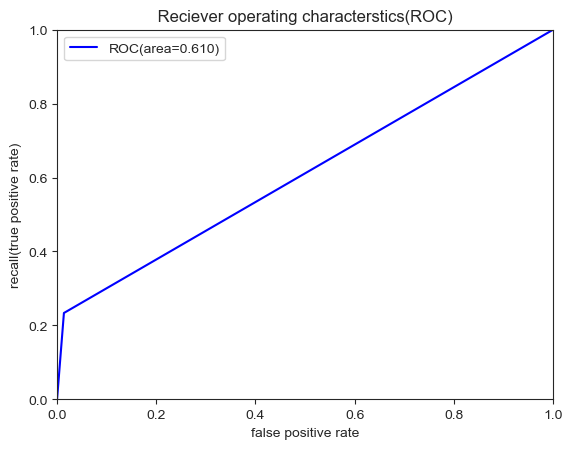

AUC  0.6098705333808998


In [55]:
#ROC_AUC_CURVE
plt.figure()
false_positive_rate,recall,thresholds = roc_curve(y_valid,cv_predict)
roc_auc = auc(false_positive_rate, recall)
plt.title(" Reciever operating characterstics(ROC) ")
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)'%roc_auc)
plt.legend()
plt.plot([0.1],[0.1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('recall(true positive rate)')
plt.xlabel('false positive rate')
plt.show()
print("AUC ",roc_auc)

Observation : Model is not performing well on imbalance dataset

    AUC ranges between 0 and 1.
    A random classifier has an AUC of 0.5, which means it's no better than chance.
    An AUC below 0.5 suggests that your model's performance is worse than random guessing.
    An AUC above 0.5 suggests that your model has some discriminatory power.

In your case, an AUC of 0.6098 indicates that your model is performing better than random guessing, which is a positive sign. However, the closer the AUC is to 1.0, the better the model's performance. Therefore, there might still be room for improvement.

In [56]:
#classification_report
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



AS WE SEE F1 SCORE IS HIGH FOR THE CUSTOMERS WHO WILL NOT MAKE A TRANSATION COMPARE TO THOSE WHO WILL MAKE THE TRANSACTION
SO "WE HAVE TO CHANGE THE ALGORITHM"

In [57]:
%%time
# Model performance on test data
X_test = df_test.drop(['ID_code'],axis=1)
lr_pred = lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
CPU times: total: 1.81 s
Wall time: 2.85 s


TYPE MARKDOWN AND LATEX  :
    
    OVERSAMPLE MINORITY CLASS
    *ADDING MORE SAMPLES TO MINORITY CLASS
    *CAN BE A GOOD OPTION IF WE DONT HAVE A MUCH LARGER DATA TO WORK
    *DRAWBACK WE ARE ADDING INFO WHICH MAY LEAD TO OVERFITTING OR POOR PERFORMANCE
    
    UNDERSAMPLE MAJORITY CLASS
    *REMOVING SOME COPIES OF MAJORITY CLASS
    *CAN BE OF VERY GOOD OPTION IF WE HAVE LARGE AMT OF DATA
    *WE ARE REMOVING SOME VALUABLE INFO THAT CAN LEAD TO UNDERFITTING 
    
    AS PER THE DRAWBACKS OF BOTH THE MODEL WE WILL USE SMOTE(synthetic minority oversampling tech) 
    This is a statistical meth for increase the no. of cases in a dataset in a balance way,uses nearest neighbour algo
    to generate new and synthetic data to use for traning the model

## building logistic regression model on synthetic data

In [66]:
%%time 
smote = LogisticRegression(random_state=42)
smote.fit(X_smote,y_smote)

CPU times: total: 1min 1s
Wall time: 28.8 s


LogisticRegression(random_state=42)

In [63]:
%%time
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1.0, random_state=42)

# Generate synthetic data points for the training set
X_smote, y_smote = sm.fit_resample(X_train, y_train)

# Generate synthetic data points for the validation set
X_smote_v, y_smote_v = sm.fit_resample(X_valid, y_valid)

CPU times: total: 22.1 s
Wall time: 13.9 s


In [68]:
#Accuracy of the model
smote_score = smote.score(X_smote,y_smote)
("accuracy of smote_model : ",smote_score)          #AACCURACY IMPROVED AGAINST AUCROC CURVE

('accuracy of smote_model : ', 0.7885347618849099)

In [69]:
%%time
# cross validation prediction of model
cv_predict= cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)

# cross validaion score
cv_score = cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print("cross_val_score :",np.mean(cv_score))

cross_val_score : 0.7959421901056143
CPU times: total: 2min 5s
Wall time: 34.3 s


In [75]:
# Confusion matrix
cm = confusion_matrix(y_smote_v,cv_predict)
cm = pd.crosstab(y_smote_v,cv_predict)

In [76]:
cm    # THEY ARE EVENLY DISTRIBUTED AND IT LOOKS MUCH MORE BALANCE

col_0       0      1
target              
0       28134   7846
1        6838  29142

In [ ]:
#ROC_AUC SCORE
roc_score = roc_auc_score(y_smote_v,cv_predict)
print("ROC SCORE : ",roc_score)

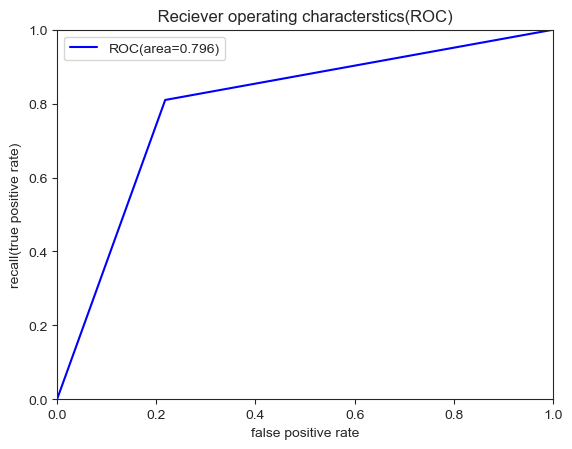

AUC  0.7959421901056143


In [78]:
#ROC_AUC_CURVE
plt.figure()
false_positive_rate,recall,thresholds = roc_curve(y_smote_v,cv_predict)
roc_auc = auc(false_positive_rate, recall)
plt.title(" Reciever operating characterstics(ROC) ")
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)'%roc_auc)
plt.legend()
plt.plot([0.1],[0.1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('recall(true positive rate)')
plt.xlabel('false positive rate')
plt.show()
print("AUC ",roc_auc)

In [79]:
# Classification report 
scores=classification_report(y_smote_v,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



OBSERVATION : we can see that f1 score is high for customers who will not make a transaction as well as who will make a
transaction

In [80]:
%%time
# Predicting the model
X_test = df_test.drop(['ID_code'],axis=1)
smote_pred = smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
CPU times: total: 3.06 s
Wall time: 6.24 s


we can observe that smote model is performing better then simple logistic regression

## LIGHT GBM : GRADIENT BOOSTING FRAMEWORK THAT USES TREE BASED LEARNING    ## ALGORITHM


In [81]:
# Traning the data
lgb_train = lgb.Dataset(X_train,label = y_train)

# validating the data
lgb_valid = lgb.Dataset(X_valid,label = y_valid)



In [83]:
#selecting best hyperparameter by tuning of different paramater
params = {
    'boosting_type': 'gbdt', 
    'max_depth':-1,
    'objective': 'binary',
    'boost_from_average':False,
    'n_thread':20,
    'metric': 'auc',                 
    'num_leaves': 50,                 
    'learning_rate': 0.01,
    'max_bin':100,
    'subsample for bin':100,
    'subsample':1,
    'subsample_freq':1,
    'colsample_bytree':0.8,
    'feature_fraction': 0.9, 
    'min_split_gain':0.45,
    'min_child_weight':1,
    'is_unbalance':True,                   
}

In [ ]:

num_round = 20000
lgbm = lgb.train(params, lgb_train, num_round, valid_sets = [lgb_train, lgb_valid],
       verbose_eval=1000,early_stopping_rounds = 5000)

# Prediction
predictions = lgbm.predict(test, num_iteration=lgbm.best_iteration)

In [100]:
num_rounds = 10000
lgbm = lgb.train(params, lgb_train, num_rounds, valid_sets=[lgb_train, lgb_valid])

# It should be this but I am getting error
# gbm = lgb.train(params, lgb_train, num_rounds, valid_sets=[lgb_train, lgb_valid], verbose_eval=1000, early_stopping_rounds=5000)

[LightGBM] [Warning] subsample is set=, subsample=1 will be ignored. Current value: subsample=
[LightGBM] [Warning] Unknown parameter: n_thread
[LightGBM] [Warning] Unknown parameter: for
[LightGBM] [Warning] Unknown parameter: bin
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] subsample is set=, subsample=1 will be ignored. Current value: subsample=
[LightGBM] [Warning] Unknown parameter: n_thread
[LightGBM] [Warning] Unknown parameter: for
[LightGBM] [Warning] Unknown parameter: bin
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20000
[LightGBM] [Info

In [108]:
#LGB MODEL ON TEST DATA
X_test = df_test.drop(['ID_code'],axis=1)

# Probsbility prediction
lgbm_predict_prob = lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)

#convert binary op 1 or 0
lgbm_predict = np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.21245359 0.35836046 0.48148228 ... 0.00349037 0.18467545 0.15553221]
[0 0 0 ... 0 0 0]


In [87]:
pip install --upgrade lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

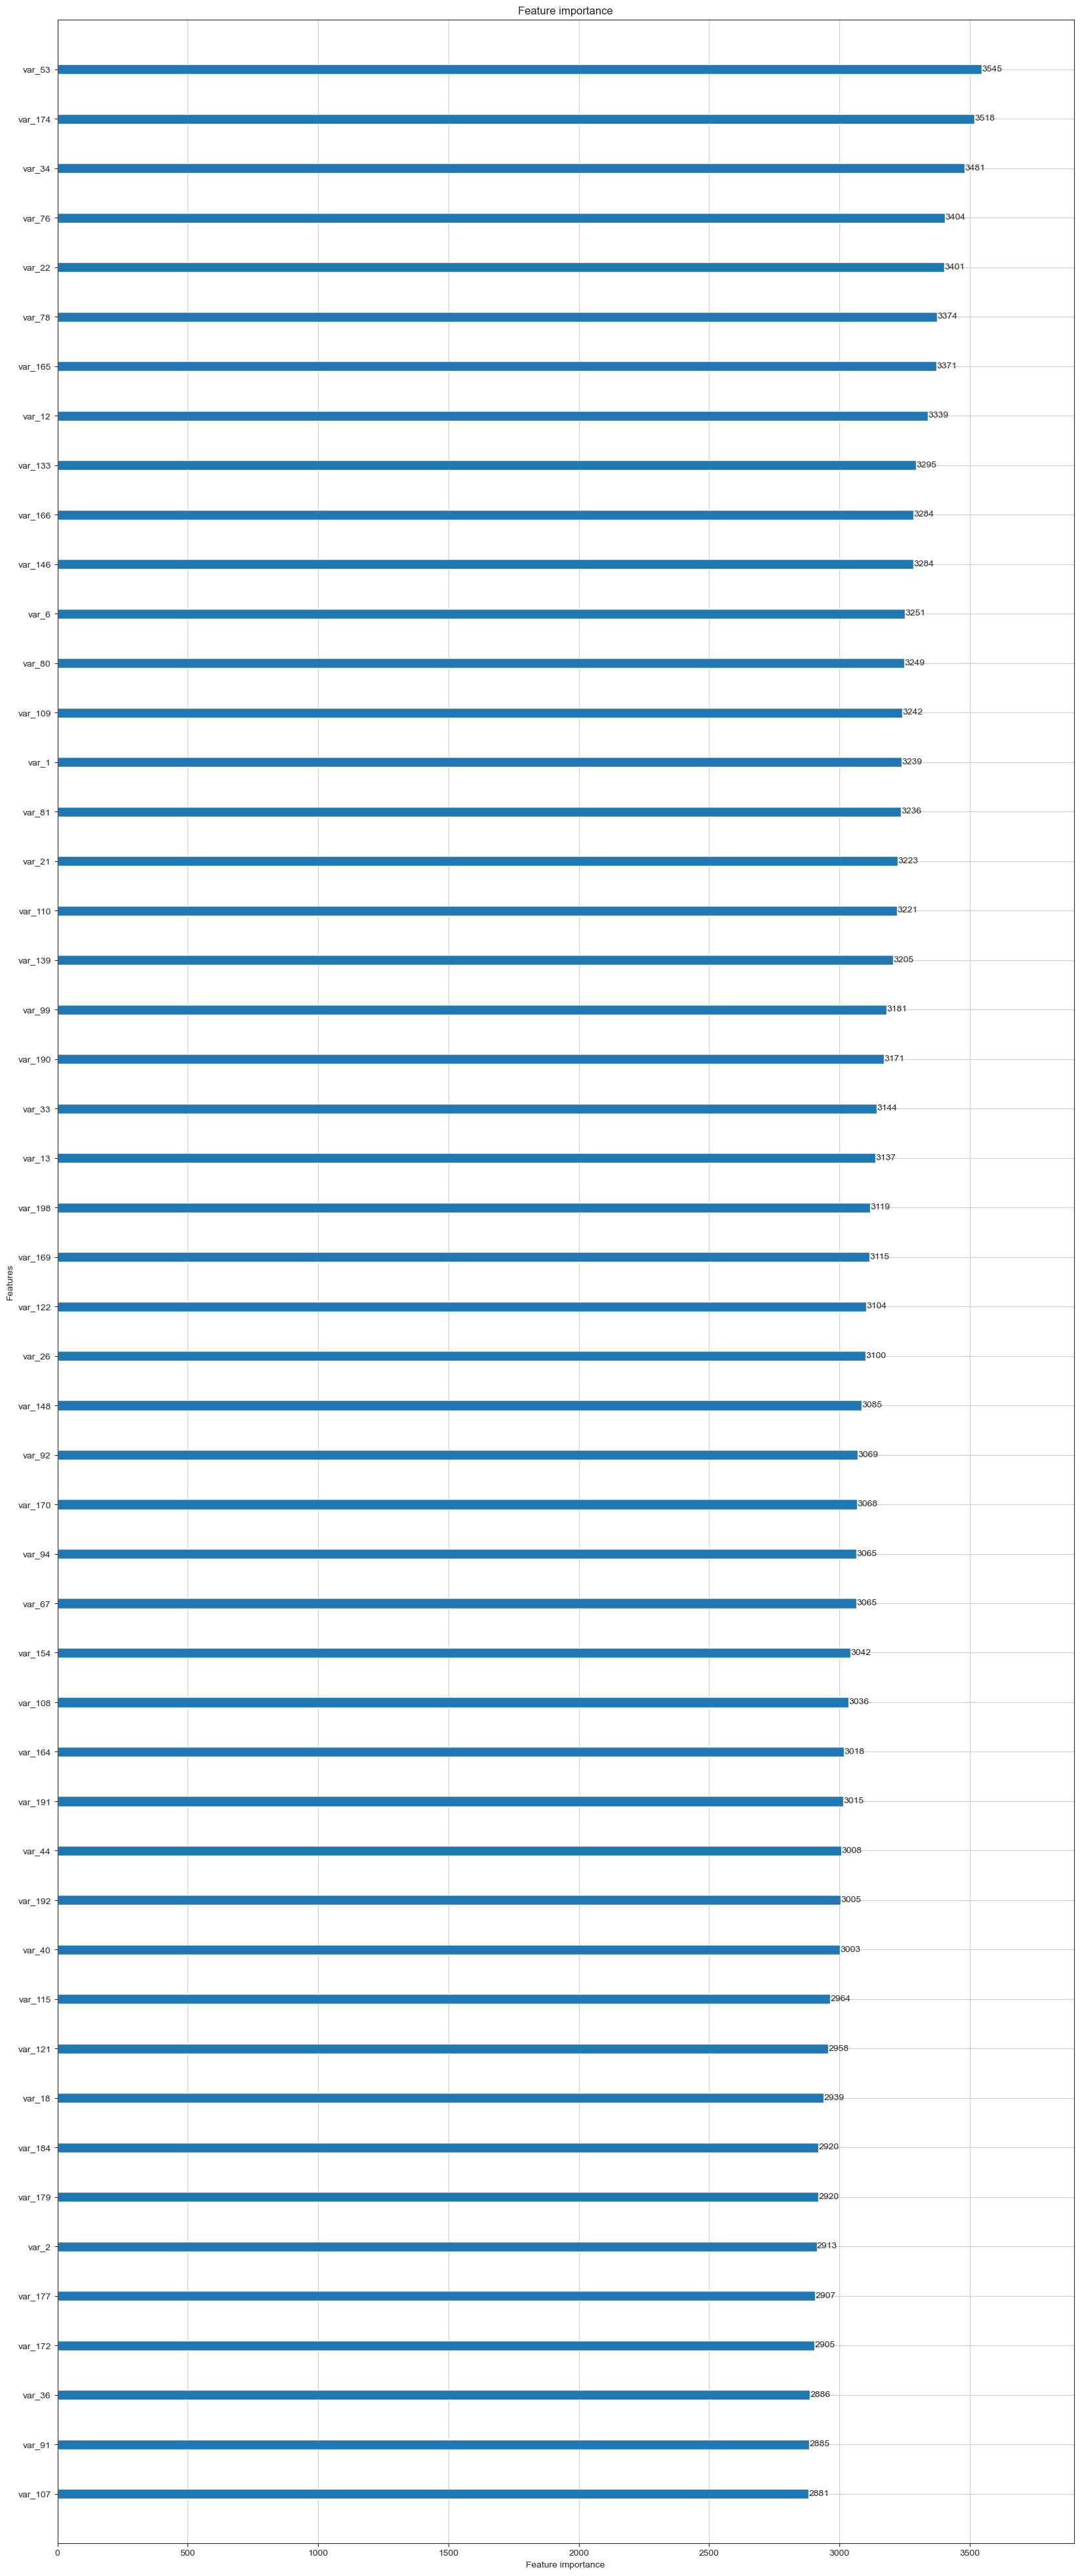

In [104]:
#PLOTTING OF IMP FEATURES
lgb.plot_importance(lgbm,max_num_features=50,importance_type='split',figsize=(20,50))


Conclusion :
we have tried with different model like logistic,smoth,lightbtm, we observe that lightbtm is performing well on imbalance 
data as compare to other model

In [109]:
# final submission
df_sub=pd.DataFrame({'ID_code':df_test['ID_code'].values})
df_sub['lgbm_predict_prob'] = lgbm_predict_prob
df_sub['lgbm_predict'] = lgbm_predict
df_sub.to_csv('submission.csv',index=False)
df_sub.head()

ID_code  lgbm_predict_prob  lgbm_predict
0  test_0           0.212454             0
1  test_1           0.358360             0
2  test_2           0.481482             0
3  test_3           0.278954             0
4  test_4           0.092075             0